# 机器学习练习 5 - 偏差和方差

本章代码涵盖了基于Python的解决方案，用于Coursera机器学习课程的第五个编程练习。 请参考[练习文本](ex5.pdf)了解详细的说明和公式。

代码修改并注释：黄海广，haiguang2000@qq.com

In [238]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
def load_data():
    """for ex5
    d['X'] shape = (12, 1)
    pandas has trouble taking this 2d ndarray to construct a dataframe, so I ravel
    the results
    """
    d = sio.loadmat('ex5data1.mat')
    return map(np.ravel, [d['X'], d['y'], d['Xval'], d['yval'], d['Xtest'], d['ytest']])

In [240]:
X, y, Xval, yval, Xtest, ytest = load_data()

In [241]:
list(load_data())

[array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
        -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
          1.38915437, -44.38375985,   7.01350208,  22.76274892]),
 array([ 2.13431051,  1.17325668, 34.35910918, 36.83795516,  2.80896507,
         2.12107248, 14.71026831,  2.61418439,  3.74017167,  3.73169131,
         7.62765885, 22.7524283 ]),
 array([-16.74653578, -14.57747075,  34.51575866, -47.01007574,
         36.97511905, -40.68611002,  -4.47201098,  26.53363489,
        -42.7976831 ,  25.37409938, -31.10955398,  27.31176864,
         -3.26386201,  -1.81827649, -40.7196624 , -50.01324365,
        -17.41177155,   3.5881937 ,   7.08548026,  46.28236902,
         14.61228909]),
 array([ 4.17020201e+00,  4.06726280e+00,  3.18730676e+01,  1.06236562e+01,
         3.18360213e+01,  4.95936972e+00,  4.45159880e+00,  2.22763185e+01,
        -4.38738274e-05,  2.05038016e+01,  3.85834476e+00,  1.93650529e+01,
         4.88376281e+00,  1.10971588e+01,  7.4617082

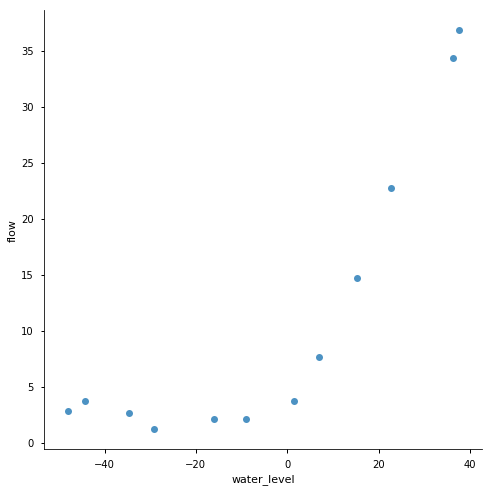

In [242]:
df = pd.DataFrame({'water_level':X, 'flow':y})
sns.set_context('notebook')
sns.lmplot('water_level', 'flow', data=df, fit_reg=False, size=7)
plt.show()

In [243]:
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

# 代价函数
<img style="float: left;" src="../img/linear_cost.png">

In [244]:
(X, Xval, Xtest)

(array([[  1.        , -15.93675813],
        [  1.        , -29.15297922],
        [  1.        ,  36.18954863],
        [  1.        ,  37.49218733],
        [  1.        , -48.05882945],
        [  1.        ,  -8.94145794],
        [  1.        ,  15.30779289],
        [  1.        , -34.70626581],
        [  1.        ,   1.38915437],
        [  1.        , -44.38375985],
        [  1.        ,   7.01350208],
        [  1.        ,  22.76274892]]), array([[  1.        , -16.74653578],
        [  1.        , -14.57747075],
        [  1.        ,  34.51575866],
        [  1.        , -47.01007574],
        [  1.        ,  36.97511905],
        [  1.        , -40.68611002],
        [  1.        ,  -4.47201098],
        [  1.        ,  26.53363489],
        [  1.        , -42.7976831 ],
        [  1.        ,  25.37409938],
        [  1.        , -31.10955398],
        [  1.        ,  27.31176864],
        [  1.        ,  -3.26386201],
        [  1.        ,  -1.81827649],
        [  

In [245]:
(X, Xval, Xtest)

(array([[  1.        , -15.93675813],
        [  1.        , -29.15297922],
        [  1.        ,  36.18954863],
        [  1.        ,  37.49218733],
        [  1.        , -48.05882945],
        [  1.        ,  -8.94145794],
        [  1.        ,  15.30779289],
        [  1.        , -34.70626581],
        [  1.        ,   1.38915437],
        [  1.        , -44.38375985],
        [  1.        ,   7.01350208],
        [  1.        ,  22.76274892]]), array([[  1.        , -16.74653578],
        [  1.        , -14.57747075],
        [  1.        ,  34.51575866],
        [  1.        , -47.01007574],
        [  1.        ,  36.97511905],
        [  1.        , -40.68611002],
        [  1.        ,  -4.47201098],
        [  1.        ,  26.53363489],
        [  1.        , -42.7976831 ],
        [  1.        ,  25.37409938],
        [  1.        , -31.10955398],
        [  1.        ,  27.31176864],
        [  1.        ,  -3.26386201],
        [  1.        ,  -1.81827649],
        [  

In [246]:
def cost(theta, X, y):
    """
    X: R(m*n), m records, n features
    y: R(m)
    theta : R(n), linear regression parameters
    """
    m = X.shape[0]

    inner = X @ theta - y  # R(m*1)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [247]:
theta = np.ones(X.shape[1])
cost(theta, X, y)

303.9515255535976

# 梯度
<img style="float: left;" src="../img/linear_gradient.png">

In [248]:
def gradient(theta, X, y):
    m = X.shape[0]

    inner = X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)

    return inner / m

In [249]:
gradient(theta, X, y)

array([-15.30301567, 598.16741084])

# 正则化梯度
<img style="float: left;" src="../img/linear_reg_gradient.png">

In [250]:
def regularized_gradient(theta, X, y, l=1):
    m = X.shape[0]

    regularized_term = theta.copy()  # same shape as theta
    regularized_term[0] = 0  # don't regularize intercept theta

    regularized_term = (l / m) * regularized_term

    return gradient(theta, X, y) + regularized_term

In [251]:
regularized_cost(theta, X, y)

303.9931922202643

In [252]:
regularized_gradient(theta, X, y)

array([-15.30301567, 598.25074417])

# 拟合数据
> 正则化项 $\lambda=0$

In [253]:
def linear_regression_np(X, y, l=1):
    """linear regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.ones(X.shape[1])

    # train it
    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    return res


In [254]:
regularized_gradient(theta, X, y)

array([-15.30301567, 598.25074417])

In [255]:
theta = np.ones(X.shape[1])
for _ in range(100000):
    step_gradient = regularized_gradient(theta, X, y)
    theta = theta - 0.001*step_gradient
print(theta)

[13.08771416  0.367742  ]


In [256]:
linear_regression_np(X, y)

     fun: 22.37954182294026
     jac: array([1.25341733e-08, 8.56473651e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 7
     nit: 3
  status: 0
 success: True
       x: array([13.08771417,  0.367742  ])

In [257]:
def regularized_cost(theta, X, y, l=1):
    m = X.shape[0]

    regularized_term = (l / (2 * m)) * np.power(theta[1:], 2).sum()

    return cost(theta, X, y) + regularized_term

In [258]:
theta = np.ones(X.shape[0])

final_theta = linear_regression_np(X, y, l=0).get('x')

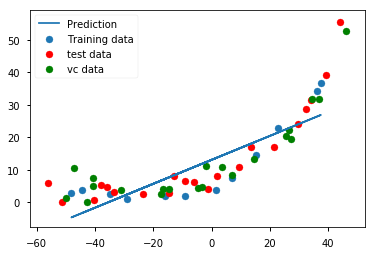

In [259]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(X[:,1], y, label="Training data")
plt.plot(X[:, 1], X[:, 1]*m + b, label="Prediction")
plt.scatter(Xtest[:, 1], ytest, c='r', label="test data")
plt.scatter(Xval[:, 1], yval, c='g', label="vc data")
plt.legend(loc=2)
plt.show()

In [260]:
training_cost, cv_cost = [], []

1.使用训练集的子集来拟合应模型

2.在计算训练代价和交叉验证代价时，没有用正则化

3.记住使用相同的训练集子集来计算训练代价

In [261]:
training_cost, cv_cost = [], []
m = X.shape[0]
for i in range(1, m+1):
    print('i={}'.format(i))
    res = linear_regression_np(X[:i, :], y[:i], l=0)
    
    tc = regularized_cost(res.x, X[:i, :], y[:i], l=0)
    cv = regularized_cost(res.x, Xval, yval, l=0)
    print('tc={}, cv={}'.format(tc, cv))
    
    training_cost.append(tc)
    cv_cost.append(cv)

i=1
tc=8.631534185484672e-18, cv=169.87070840820138
i=2
tc=1.1982973737990733e-17, cv=110.30036579345536
i=3
tc=3.2865950455012705, cv=45.01023129175528
i=4
tc=2.842677689399799, cv=48.36891142759898
i=5
tc=13.154048809114986, cv=35.86516378053954
i=6
tc=19.443962512495503, cv=33.82996187443447
i=7
tc=20.098521655088927, cv=31.970985697553708
i=8
tc=18.17285869520003, cv=30.862446276219675
i=9
tc=22.609405424954723, cv=31.135997980730654
i=10
tc=23.261461592611823, cv=28.9362075578165
i=11
tc=24.317249588044316, cv=29.55143239179086
i=12
tc=22.373906495108912, cv=29.433818153684726


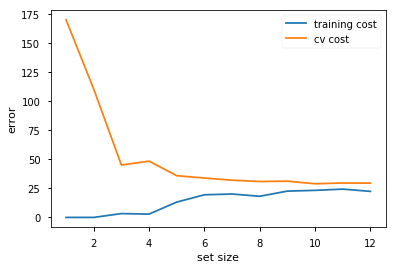

In [262]:
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv cost')
plt.legend(loc=1)
plt.xlabel('set size')
plt.ylabel('error')
plt.show()

这个模型拟合不太好, **欠拟合了**

# 创建多项式特征

In [263]:
def prepare_poly_data(*args, power):
    """
    args: keep feeding in X, Xval, or Xtest
        will return in the same order
    """
    def prepare(x):
        # expand feature
        df = poly_features(x, power=power)

        # normalization
        ndarr = normalize_feature(df).as_matrix()

        # add intercept term
        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)

    return [prepare(x) for x in args]

In [264]:
def poly_features(x, power, as_ndarray=False):
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data)

    return df.as_matrix() if as_ndarray else df


In [265]:
X, y, Xval, yval, Xtest, ytest = load_data()

In [266]:
poly_features(X, power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


In [267]:
normalize_feature(poly_features(X, power=3))

,f1,f2,f3
0,-0.362141,-0.755087,0.182226
1,-0.803205,0.001258,-0.247937
2,1.377467,0.584827,1.249769
3,1.420940,0.706647,1.359846
4,-1.434149,1.854000,-2.037163
5,-0.128687,-0.975969,0.251385
6,0.680582,-0.780029,0.340656
7,-0.988534,0.451358,-0.601282
8,0.216076,-1.074993,0.266275
9,-1.311501,1.422806,-1.548121


# 准备多项式回归数据
1. 扩展特征到 8阶,或者你需要的阶数
2. 使用 **归一化** 来合并 $x^n$ 
3. don't forget intercept term

In [268]:
def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())
#     return (df - df.mean()) / df.std()

In [269]:
X_poly, Xval_poly, Xtest_poly= prepare_poly_data(X, Xval, Xtest, power=8)
X_poly[:3, :]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

# 画出学习曲线
> 首先，我们没有使用正则化，所以 $\lambda=0$

In [270]:
def plot_learning_curve(X, y, Xval, yval, l=0):
    training_cost, cv_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        # regularization applies here for fitting parameters
        res = linear_regression_np(X[:i, :], y[:i], l=l)

        # remember, when you compute the cost here, you are computing
        # non-regularized cost. Regularization is used to fit parameters only
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)


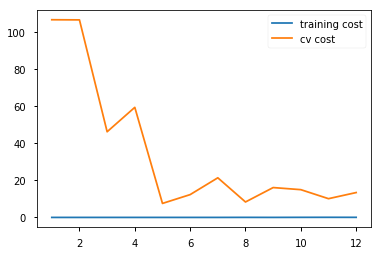

In [271]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=0)
plt.show()

你可以看到训练的代价太低了，不真实. 这是 **过拟合**了

# try $\lambda=1$

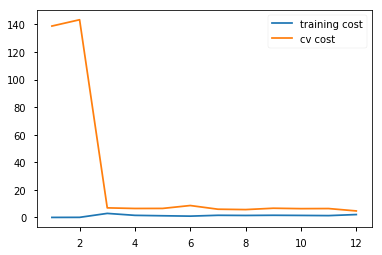

In [188]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=1)
plt.show()


训练代价增加了些，不再是0了。
也就是说我们减轻**过拟合**

# try $\lambda=100$

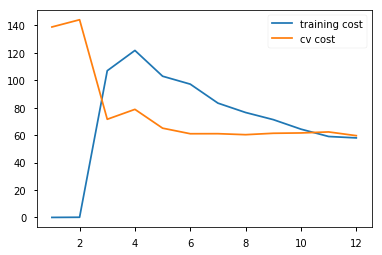

In [284]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=100)
plt.show()

太多正则化了.  
变成 **欠拟合**状态

# 找到最佳的 $\lambda$

In [272]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [273]:
for l in l_candidate:
    res = linear_regression_np(X_poly, y, l)
    
    tc = cost(res.x, X_poly, y)
    cv = cost(res.x, Xval_poly, yval)
    
    training_cost.append(tc)
    cv_cost.append(cv)

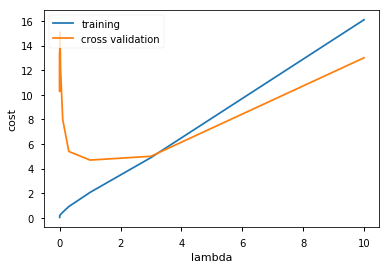

In [274]:
plt.plot(l_candidate, training_cost, label='training')
plt.plot(l_candidate, cv_cost, label='cross validation')
plt.legend(loc=2)

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()

In [103]:
# best cv I got from all those candidates
l_candidate[np.argmin(cv_cost)]

1

In [104]:
# use test data to compute the cost
for l in l_candidate:
    theta = linear_regression_np(X_poly, y, l).x
    print('test cost(l={}) = {}'.format(l, cost(theta, Xtest_poly, ytest)))

test cost(l=0) = 10.122298845834932
test cost(l=0.001) = 10.989357236615056
test cost(l=0.003) = 11.26731092609127
test cost(l=0.01) = 10.881623900868235
test cost(l=0.03) = 10.02232745596236
test cost(l=0.1) = 8.632062332318977
test cost(l=0.3) = 7.336513212074589
test cost(l=1) = 7.466265914249742
test cost(l=3) = 11.643931713037912
test cost(l=10) = 27.7150802906621


调参后， $\lambda = 0.3$ 是最优选择，这个时候测试代价最小